In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set
from ML2_lib import additive_noise

In [39]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
noise = "lognormal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
title = f"noise type = {noise} Error variable = {E_var}"

  0%|          | 0/10 [00:00<?, ?it/s]

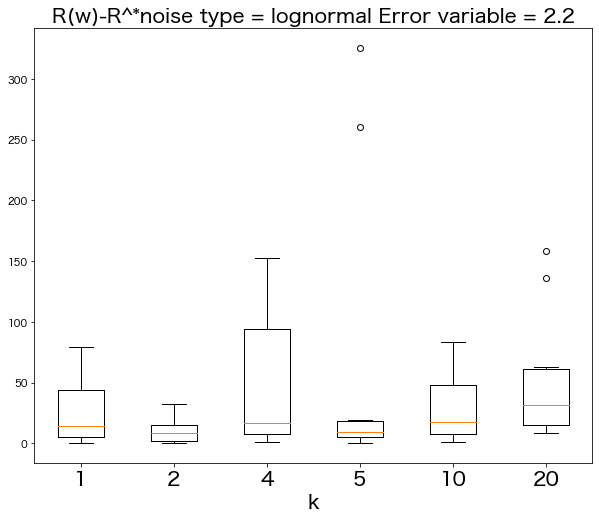

In [40]:
trail_num  = 10
_, result_loss_gauss = RV.many_trails(trial_num=trail_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [41]:
k_list = [1,2,4,5,10,20]
result = RV.multiple_k_transition(k_list=k_list,w_init=w_init)

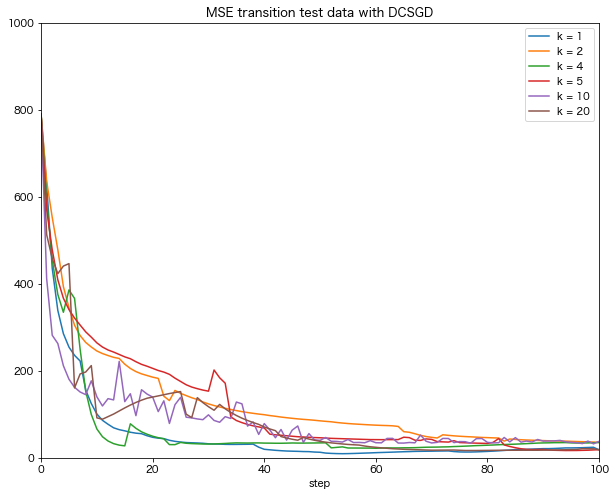

In [42]:
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=result, k_list=columns,xlim=[0,100],ylim=[0,1000])

In [43]:

a = additive_noise.Noise(n=10000,sigma=1.75).lognormal()

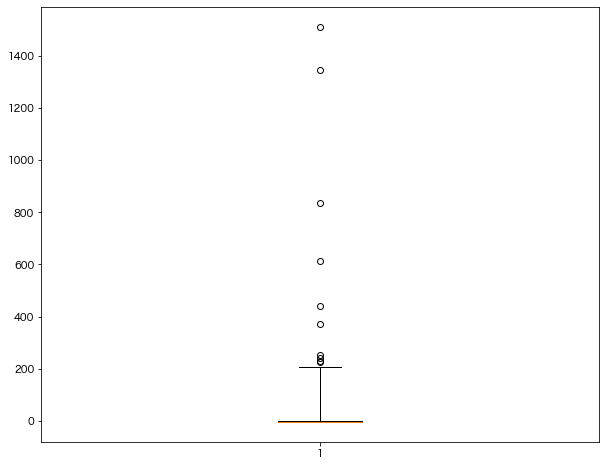

In [44]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.boxplot(a[0],whis=[0,99.9])


plt.show()

In [45]:
a

array([[-1.46168648, -4.0979489 , -4.58627395, ..., -3.84301107,
        -4.48725177,  1.57522447]])